# Instalations

In [ ]:
!pip install varclushi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 12.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.1
[notice] To update, run: pip install --upgrade pip


# Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from varclushi import VarClusHi

# Reading data

In [ ]:
train = pd.read_csv("use_to_train.csv")
train

,fuel_consumption_km_l,horsepower,displacement,gears,torque,passengers,doors,wheels,price,km,...,sunroof,rear_sensor,start_stop,turbo,seat_material,trunk_opening,headlights,body_type,electric_parking_brake,electric_locks
0,9,208,2.0,9,258,5,4,16.0000,451999,94000,...,Sí,Sí,Sí,Sí,OtroMaterial,Remota,OtroHeadlights,Sedan,Sí,Remoto
1,12,225,2.0,7,258,5,4,18.0000,281999,76713,...,Sí,Sí,Sí,Sí,OtroMaterial,Remota,Estándar,Sedan,Sí,Remoto
2,9,145,2.0,6,136,5,5,16.0000,224999,55156,...,No,No,No,No,OtroMaterial,Remota,Estándar,Suv,No,Remoto
3,16,84,1.0,5,89,2,3,16.7694,171999,54400,...,Sí,No,Sí,Sí,Tela,Remota,OtroHeadlights,Hatchback,No,Remoto
4,9,154,2.0,6,148,5,5,17.0000,199999,41730,...,Sí,Sí,No,No,Piel,Remota,Estándar,Hatchback,No,Remoto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,14,121,1.6,6,111,5,5,17.0000,319999,23444,...,No,Sí,No,No,Tela,Remota,OtroHeadlights,Suv,No,Llave
933,12,113,2.0,5,122,5,4,15.0000,161999,119800,...,No,No,No,No,Tela,Remota,OtroHeadlights,Sedan,No,Llave
934,14,181,2.4,6,175,5,5,17.0000,377999,76646,...,No,Sí,No,No,Piel,Remota,Estándar,Suv,No,Llave
935,15,118,1.5,0,107,7,5,16.0000,285999,59241,...,No,Sí,No,No,Tela,NoInfo,OtroHeadlights,Suv,No,Llave


In [ ]:
var_int = train.select_dtypes(include=['int', 'float']).columns.tolist()
var_int_without_y = train.drop('price', axis=1).select_dtypes(include=['int', 'float']).columns.tolist()
var_disc = train.select_dtypes(include=['object']).columns.tolist()
all_var = train[var_int + var_disc].columns.tolist()
all_var_without_y = train[var_int_without_y + var_disc].columns.tolist()

In [ ]:
train.dtypes

fuel_consumption_km_l       int64
horsepower                  int64
displacement              float64
gears                       int64
torque                      int64
passengers                  int64
doors                       int64
wheels                    float64
price                       int64
km                          int64
age                         int64
touch_screen               object
navigation_system          object
push_start                 object
rear_cupholders            object
sunroof                    object
rear_sensor                object
start_stop                 object
turbo                      object
seat_material              object
trunk_opening              object
headlights                 object
body_type                  object
electric_parking_brake     object
electric_locks             object
dtype: object

# Correlation

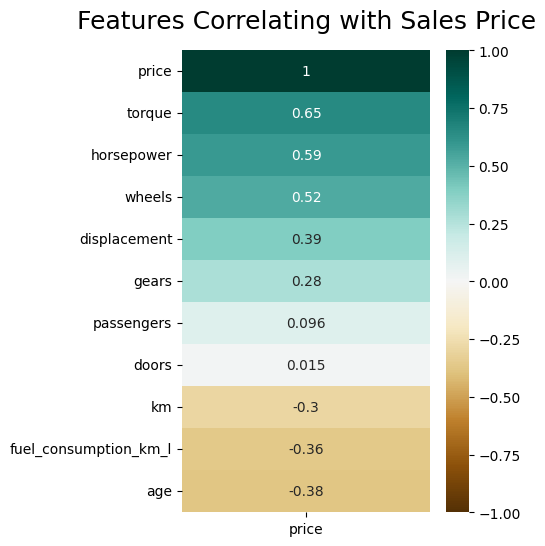

In [ ]:
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(train[var_int].corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

# Checking variance

In [ ]:
df_aux = train[var_int_without_y].copy()

In [ ]:
scaler = MinMaxScaler(feature_range=(10, 100))

In [ ]:
df_aux2 = pd.DataFrame(scaler.fit_transform(df_aux[var_int_without_y]), columns = var_int_without_y)

In [ ]:
vt = VarianceThreshold(threshold=0.10)

In [ ]:
vt.fit(df_aux2[var_int_without_y])

VarianceThreshold(threshold=0.1)

In [ ]:
varianza_peq = [v for v,nu in zip(df_aux2[var_int_without_y].columns,vt.get_support()) if not nu]
len(varianza_peq)

0

# VarClushi

In [ ]:
label_encoders = {}  # Dictionary to store LabelEncoder objects for each column

for column in var_disc:
    label_encoders[column] = LabelEncoder()
    train[column] = label_encoders[column].fit_transform(train[column])

In [ ]:
vars_aux = all_var_without_y

In [ ]:
df_aux = train[all_var_without_y].copy()

In [ ]:
np.isinf(df_aux[all_var_without_y]).values.sum()

0

In [ ]:
vc = VarClusHi(df = df_aux[all_var_without_y], feat_list= all_var_without_y)
vc.varclus()

In [ ]:
rs = vc.rsquare
rs = rs.sort_values(by=['Cluster', 'RS_Ratio']).reset_index(drop = True)
rs['id'] = rs.groupby('Cluster').cumcount()+1

In [ ]:
rs
#horsepower

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio,id
0,0,horsepower,0.920724,0.297531,0.112853,1
1,0,torque,0.869201,0.254923,0.175551,2
2,0,displacement,0.763390,0.172719,0.286009,3
3,0,fuel_consumption_km_l,0.632343,0.120090,0.417835,4
4,0,wheels,0.633540,0.373146,0.584602,5
5,1,start_stop,0.714380,0.039392,0.297332,1
6,1,turbo,0.688299,0.032309,0.322108,2
7,1,electric_parking_brake,0.498593,0.063540,0.535428,3
8,1,gears,0.313153,0.056770,0.728186,4
9,1,seat_material,0.333639,0.156549,0.790041,5


## Feauture selection finalist

- Cat 0: ['horsepower', 'torque', 'displacement', 'fuel_consumption_km_l', 'wheels']

- Cat 1: ['start_stop', 'turbo', 'gears', 'electric_parking_brake', 'trunk_opening']

- Cat 2: ['push_start', 'rear_sensor', 'touch_screen', 'electric_locks']

- Cat 3: ['doors', 'passengers', 'body_type']

- Cat 4: ['km', 'age']

- Cat 5: ['navigation_system',]

In [ ]:
# train[['horsepower', 'torque', 'displacement', 'fuel_consumption_km_l', 'start_stop', 'turbo', 'push_start', 'doors', 'km', 'age', 'navigation_system', 'sunroof'. 'body_type', 'passengers']]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a817877f-bc24-4404-a1bc-b1f4f599a592' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>